In [1]:
import pandas as pd 
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.activations import softmax,sigmoid,relu
from keras import optimizers


C:\Users\FUCK\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [169]:
train = pd.read_csv('output05.csv')                #raw data
train_label = pd.read_csv('output_label_PDOP.csv') #raw label

In [245]:
#方便比對normalize後的raw data table
train_init = pd.read_csv('output05.csv')
train[0:8]

,sat_id,az,el,pr,qzss,gps
0,0.000000,1.000000,0.784450,0.020942,0,1
1,0.020067,0.154529,0.798025,0.020942,0,1
2,0.023411,0.505611,0.549276,0.083770,0,1
3,0.026756,0.000000,0.128516,0.240838,0,1
4,0.030100,0.591684,0.000000,0.303665,0,1
5,0.033445,0.129597,1.000000,0.000000,0,1
6,0.050167,0.740758,0.241888,0.198953,0,1
7,0.056856,0.715208,0.925704,0.000000,0,1


In [224]:
#normalization
def ave_num(tryit):
    min_val=min(tryit)
    max_val=max(tryit)
    new_data=[]
    for i in tryit:
        x=(i-min_val)/(max_val-min_val)
        new_data.append(x)
    return new_data
train['sat_id']=ave_num(train['sat_id'].values)
train['az']=ave_num(train['az'].values)
train['el']=ave_num(train['el'].values)
train['pr']=ave_num(train['pr'].values)
train

,sat_id,az,el,pr,qzss,gps
0,0.000000,1.000000,0.784450,0.020942,0,1
1,0.020067,0.154529,0.798025,0.020942,0,1
2,0.023411,0.505611,0.549276,0.083770,0,1
3,0.026756,0.000000,0.128516,0.240838,0,1
4,0.030100,0.591684,0.000000,0.303665,0,1
5,0.033445,0.129597,1.000000,0.000000,0,1
6,0.050167,0.740758,0.241888,0.198953,0,1
7,0.056856,0.715208,0.925704,0.000000,0,1
8,0.070234,0.891126,0.220788,0.188482,0,1
9,0.000000,1.000000,0.784450,0.020942,0,1


In [225]:
for i,j in zip(range(len(train_label)),range(0,len(train),9)):
    exec('train_'+str(i)+'=train[:][j:j+9].values')  #跟matlab eval()差不多
    

In [226]:
input_shape = len(train_0[0][:])*len(train_0[:])
new_matrix = []
for i in range(len(train_label)):
    exec('train_new_'+str(i)+'=train_'+str(i)+'.reshape(input_shape)')
    exec('new_matrix = np.append(new_matrix, train_new_'+str(i)+')')
new_matrix = new_matrix.reshape(len(train_label),input_shape) #real train data


In [248]:
df = pd.DataFrame(new_matrix)
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.000000,1.000000,0.784450,0.020942,0.0,1.0,0.020067,0.154529,0.798025,0.020942,...,0.925704,0.000000,0.0,1.0,0.070234,0.891126,0.220788,0.188482,0.0,1.0
1,0.000000,1.000000,0.784450,0.020942,0.0,1.0,0.020067,0.154529,0.798025,0.020942,...,0.925704,0.000000,0.0,1.0,0.086957,0.581023,0.229528,0.193717,0.0,1.0
2,0.000000,1.000000,0.784450,0.020942,0.0,1.0,0.020067,0.154529,0.798025,0.020942,...,0.925704,0.000000,0.0,1.0,0.090301,0.262718,0.138297,0.256545,0.0,1.0
3,0.000000,1.000000,0.784450,0.020942,0.0,1.0,0.020067,0.154529,0.798025,0.020942,...,0.925704,0.000000,0.0,1.0,0.331104,0.925378,0.233012,0.884817,1.0,0.0
4,0.000000,1.000000,0.784450,0.020942,0.0,1.0,0.020067,0.154529,0.798025,0.020942,...,0.925704,0.000000,0.0,1.0,0.665552,0.873857,0.820948,0.869110,1.0,0.0
5,0.000000,1.000000,0.784450,0.020942,0.0,1.0,0.020067,0.154529,0.798025,0.020942,...,0.925704,0.000000,0.0,1.0,1.000000,0.542409,0.840870,1.000000,1.0,0.0
6,0.000000,1.000000,0.784450,0.020942,0.0,1.0,0.020067,0.154529,0.798025,0.020942,...,0.220788,0.188482,0.0,1.0,0.086957,0.581023,0.229528,0.193717,0.0,1.0
7,0.000000,1.000000,0.784450,0.020942,0.0,1.0,0.020067,0.154529,0.798025,0.020942,...,0.220788,0.188482,0.0,1.0,0.090301,0.262718,0.138297,0.256545,0.0,1.0
8,0.000000,1.000000,0.784450,0.020942,0.0,1.0,0.020067,0.154529,0.798025,0.020942,...,0.220788,0.188482,0.0,1.0,0.331104,0.925378,0.233012,0.884817,1.0,0.0
9,0.000000,1.000000,0.784450,0.020942,0.0,1.0,0.020067,0.154529,0.798025,0.020942,...,0.220788,0.188482,0.0,1.0,0.665552,0.873857,0.820948,0.869110,1.0,0.0


In [229]:
msk = np.random.rand(len(new_matrix))<0.8

In [230]:
train_new_matrix = new_matrix[msk]
test_new_matrix = new_matrix[~msk]
train_label_ = train_label[msk]
test_label_ = train_label[~msk]


In [249]:
train_label

,labels
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,0


2002

In [231]:
model = Sequential()
model.add(Dense(units=256, input_dim=54, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               14080     
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total params: 47,105
Trainable params: 47,105
Non-trainable params: 0
_________________________________________________________________


In [236]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

train_history = model.fit(x=train_new_matrix, y=train_label_,validation_split=0.1, epochs=100, batch_size=200, verbose=2, validation_data=(test_new_matrix, test_label_))

Train on 1592 samples, validate on 410 samples
Epoch 1/100
 - 1s - loss: 0.2087 - acc: 0.9064 - val_loss: 0.1982 - val_acc: 0.9146
Epoch 2/100
 - 0s - loss: 0.2056 - acc: 0.9077 - val_loss: 0.1790 - val_acc: 0.9146
Epoch 3/100
 - 0s - loss: 0.1983 - acc: 0.9108 - val_loss: 0.1888 - val_acc: 0.9171
Epoch 4/100
 - 0s - loss: 0.2016 - acc: 0.9020 - val_loss: 0.1751 - val_acc: 0.9171
Epoch 5/100
 - 0s - loss: 0.1997 - acc: 0.9070 - val_loss: 0.1751 - val_acc: 0.9122
Epoch 6/100
 - 0s - loss: 0.1924 - acc: 0.9064 - val_loss: 0.1725 - val_acc: 0.9171
Epoch 7/100
 - 0s - loss: 0.1922 - acc: 0.9089 - val_loss: 0.1714 - val_acc: 0.9171
Epoch 8/100
 - 0s - loss: 0.1909 - acc: 0.9095 - val_loss: 0.1724 - val_acc: 0.9171
Epoch 9/100
 - 0s - loss: 0.1915 - acc: 0.9077 - val_loss: 0.1750 - val_acc: 0.9122
Epoch 10/100
 - 0s - loss: 0.1937 - acc: 0.9039 - val_loss: 0.1694 - val_acc: 0.9195
Epoch 11/100
 - 0s - loss: 0.1914 - acc: 0.9102 - val_loss: 0.1694 - val_acc: 0.9195
Epoch 12/100
 - 0s - loss: 

Epoch 97/100
 - 0s - loss: 0.1506 - acc: 0.9271 - val_loss: 0.1762 - val_acc: 0.9244
Epoch 98/100
 - 0s - loss: 0.1570 - acc: 0.9284 - val_loss: 0.1826 - val_acc: 0.9244
Epoch 99/100
 - 0s - loss: 0.1518 - acc: 0.9240 - val_loss: 0.1745 - val_acc: 0.9244
Epoch 100/100
 - 0s - loss: 0.1537 - acc: 0.9234 - val_loss: 0.1753 - val_acc: 0.9220


In [233]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

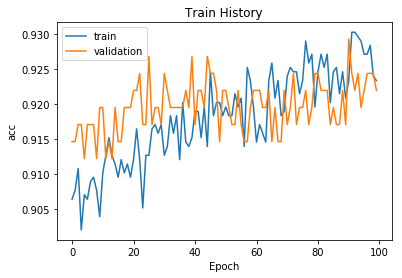

In [237]:
show_train_history(train_history, 'acc', 'val_acc')

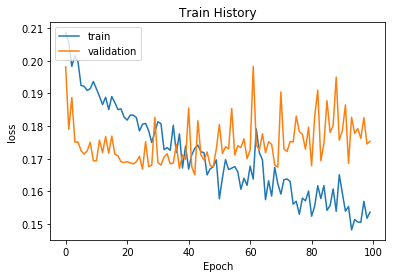

In [238]:
show_train_history(train_history, 'loss', 'val_loss')

In [ ]:
#works to do 
#1 split validation data (V)
#2 normalize data and label (V)
